# Brief Description

Cluster analysis is an important concept as it helps businesses understand the natural grouping of certain variables in a dataset. Especially for investors, in the case of this project, who want to understand the best portfolios when investing in the stock market.

The purpose of this project was to conduct Kmeans clustering to identify the different clusters of the top thirty companies on the Johannesburg Stock Exchange (JSE). The variables I used were the daily stock returns and the standard deviation of those stocks to input into the Kmeans algorithm. I also plotted a Dendrogram to visualise the hierarchical clustering as well.


In [1]:
#importing the relevant libraries
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Import data and cleaning

In [2]:
#Creating list of the tickers
tickers = ['BTI.JO','CFR.JO','AGL.JO','MTN.JO',
           'NPN.JO','SOL.JO','SBK.JO','VOD.JO',
           'KIO.JO','FSR.JO','MEI.JO','ABSP.JO',
           'SLM.JO','SHP.JO','REM.JO','NED.JO',
           'APN.JO','BVT.JO','WHL.JO','TBS.JO',
           'EXX.JO', 'RMI.JO', 'GRT.JO', 'MNP.JO',
           'SNH.JO', 'INP.JO','MSM.JO','TRU.JO',
           'ARI.JO', 'AIL.JO']

#Creating empty data frame that will be populated by the finance data that will be pulled from yahoo finance
finance_data = pd.DataFrame()
finance_data[tickers] = wb.DataReader(tickers, 
                                     data_source ='yahoo', 
                                     start = '2021-5-10', 
                                     end ='2022-5-10')['Adj Close']# will be using the Adjusted Close Prices

In [3]:
finance_data.head()

,BTI.JO,CFR.JO,AGL.JO,MTN.JO,NPN.JO,SOL.JO,SBK.JO,VOD.JO,KIO.JO,FSR.JO,...,EXX.JO,RMI.JO,GRT.JO,MNP.JO,SNH.JO,INP.JO,MSM.JO,TRU.JO,ARI.JO,AIL.JO
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10,51682.656250,14564.963867,66179.250000,9421.212891,322491.65625,24050.0,11507.861328,11819.262695,60948.042969,5129.710938,...,13714.036133,3022.878906,1348.411133,37309.425781,200.0,5280.824707,5331.0,4681.779785,25100.023438,419.0
2021-05-11,50664.687500,14205.372070,65294.562500,9381.833984,316604.56250,23700.0,11429.202148,11771.396484,59721.804688,5145.953613,...,13373.605469,3030.412842,1330.982666,35892.429688,194.0,5120.883789,5750.0,4648.444336,24556.119141,415.0
2021-05-12,51825.425781,14160.299805,66542.546875,9650.589844,311547.21875,23951.0,11419.725586,11740.423828,61515.707031,5144.998047,...,13560.508789,3015.345459,1316.306030,36457.492188,193.0,5143.863770,5538.0,4628.998535,25112.128906,415.0
2021-05-13,51701.195312,14079.955078,63784.421875,9455.667969,301242.03125,23694.0,11367.601562,11644.690430,58853.156250,5048.499512,...,13216.740234,2980.502441,1304.381348,36576.300781,194.0,5072.165527,5622.0,4630.850586,23807.277344,418.0
2021-05-14,52250.046875,14422.890625,63521.273438,9455.667969,300826.12500,23700.0,11567.565430,11815.508789,58815.421875,5090.538574,...,13497.929688,3041.713379,1324.561646,37164.542969,203.0,5242.218262,6008.0,4772.526367,24097.820312,415.0


In [4]:
#Renaming columns of the tickers to the full company names
finance_data.rename(columns = {'BTI.JO': 'British American Tobacco', 'CFR.JO':'Richemont','AGL.JO':'Anglo America','MTN.JO':'MTN', 
                               'NPN.JO': 'Naspers', 'SOL.JO':'Sasol','SBK.JO':'Standard Bank', 'VOD.JO':'Vodacom',
                               'KIO.JO':'Kumba','FSR.JO':'First Rand', 'MEI.JO':'Mediclinic', 'ABSP.JO':'ABSA', 
                               'SLM.JO':'Sanlam','SHP.JO':'Shoprite', 'REM.JO':'Remgro','NED.JO':'Nedbank',
                               'APN.JO':'Aspen','BVT.JO':'Bidvest','WHL.JO':'Woolworths','TBS.JO':'Tiger Brands',
                               'EXX.JO': 'Exxaro', 'RMI.JO':'Rand Merchant', 'GRT.JO':'GrowthPoint Properties', 'MNP.JO':'Mondi',
                               'SNH.JO': 'Steinhoff', 'INP.JO':'Investec', 'MSM.JO':'Massmart','TRU.JO':'Truworths',
                               'ARI.JO':'African Rainbow Minerals', 'AIL.JO': 'African Rainbow Capital Investments'
                              }, 
                    inplace=True)

In [5]:
print(finance_data.head())
print(finance_data.tail())

            British American Tobacco     Richemont  Anglo America  \
Date                                                                
2021-05-10              51682.656250  14564.963867   66179.250000   
2021-05-11              50664.687500  14205.372070   65294.562500   
2021-05-12              51825.425781  14160.299805   66542.546875   
2021-05-13              51701.195312  14079.955078   63784.421875   
2021-05-14              52250.046875  14422.890625   63521.273438   

                    MTN       Naspers    Sasol  Standard Bank       Vodacom  \
Date                                                                          
2021-05-10  9421.212891  322491.65625  24050.0   11507.861328  11819.262695   
2021-05-11  9381.833984  316604.56250  23700.0   11429.202148  11771.396484   
2021-05-12  9650.589844  311547.21875  23951.0   11419.725586  11740.423828   
2021-05-13  9455.667969  301242.03125  23694.0   11367.601562  11644.690430   
2021-05-14  9455.667969  300826.12500  237

In [6]:
#checking if there are any missing values
finance_data.isnull().sum() #no null values in the data set

British American Tobacco               0
Richemont                              0
Anglo America                          0
MTN                                    0
Naspers                                0
Sasol                                  0
Standard Bank                          0
Vodacom                                0
Kumba                                  0
First Rand                             0
Mediclinic                             0
ABSA                                   0
Sanlam                                 0
Shoprite                               0
Remgro                                 0
Nedbank                                0
Aspen                                  0
Bidvest                                0
Woolworths                             0
Tiger Brands                           0
Exxaro                                 0
Rand Merchant                          0
GrowthPoint Properties                 0
Mondi                                  0
Steinhoff       

In [7]:
#Calculation of stock returns annual mean and the standard deviation
#The  will calculate how much variation is precent in the daily stock prices
daily_returns =  np.log(1 + finance_data.pct_change()).dropna()
daily_returns_annual_mean = np.log(1 + finance_data.pct_change().mean())
daily_returns_annual_var =  np.log(1 + finance_data.pct_change().std())

In [8]:
daily_returns.head()

,British American Tobacco,Richemont,Anglo America,MTN,Naspers,Sasol,Standard Bank,Vodacom,Kumba,First Rand,...,Exxaro,Rand Merchant,GrowthPoint Properties,Mondi,Steinhoff,Investec,Massmart,Truworths,African Rainbow Minerals,African Rainbow Capital Investments
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-11,-0.019893,-0.024999,-0.013458,-0.004189,-0.018424,-0.014660,-0.006859,-0.004058,-0.020325,0.003161,...,-0.025137,0.002489,-0.013009,-0.038720,-0.030459,-0.030755,0.075661,-0.007146,-0.021908,-0.009592
2021-05-12,0.022652,-0.003178,0.018933,0.028244,-0.016103,0.010535,-0.000829,-0.002635,0.029595,-0.000186,...,0.013879,-0.004984,-0.011088,0.015621,-0.005168,0.004477,-0.037566,-0.004192,0.022390,0.000000
2021-05-13,-0.002400,-0.005690,-0.042333,-0.020405,-0.033637,-0.010788,-0.004575,-0.008188,-0.044247,-0.018934,...,-0.025678,-0.011623,-0.009100,0.003254,0.005168,-0.014037,0.015054,0.000400,-0.053360,0.007203
2021-05-14,0.010560,0.024064,-0.004134,0.000000,-0.001382,0.000253,0.017438,0.014563,-0.000641,0.008293,...,0.021052,0.020329,0.015353,0.015955,0.045348,0.032977,0.066404,0.030135,0.012130,-0.007203
2021-05-17,-0.003751,0.003323,0.016055,0.004881,0.016479,-0.010605,-0.007483,0.008464,0.003740,-0.018756,...,0.001236,-0.009331,-0.020994,0.003218,-0.040206,0.003675,0.029843,-0.006619,0.001148,0.011976


In [9]:
daily_returns_annual_mean

British American Tobacco               0.001078
Richemont                              0.000810
Anglo America                          0.000270
MTN                                    0.002594
Naspers                               -0.002642
Sasol                                  0.002108
Standard Bank                          0.001487
Vodacom                                0.000944
Kumba                                 -0.000569
First Rand                             0.001128
Mediclinic                             0.000779
ABSA                                   0.001769
Sanlam                                 0.000496
Shoprite                               0.001831
Remgro                                 0.001076
Nedbank                                0.001755
Aspen                                  0.000132
Bidvest                                0.000961
Woolworths                             0.000609
Tiger Brands                          -0.000949
Exxaro                                 0

In [10]:
daily_returns_annual_var

British American Tobacco               0.013018
Richemont                              0.022701
Anglo America                          0.024315
MTN                                    0.023974
Naspers                                0.032734
Sasol                                  0.029657
Standard Bank                          0.016756
Vodacom                                0.013127
Kumba                                  0.031527
First Rand                             0.016866
Mediclinic                             0.015916
ABSA                                   0.013369
Sanlam                                 0.015921
Shoprite                               0.014881
Remgro                                 0.015555
Nedbank                                0.018806
Aspen                                  0.023186
Bidvest                                0.016465
Woolworths                             0.019021
Tiger Brands                           0.017023
Exxaro                                 0

In [11]:
#Merging the annual returns and std into a single dataframe
df_returns_std = pd.concat([daily_returns_annual_mean, daily_returns_annual_var], 
                           axis=1).\
                 rename(columns={0:'Annual Returns', 1:'Standard Deviation'})
df_returns_std

,Annual Returns,Standard Deviation
British American Tobacco,0.001078,0.013018
Richemont,0.000810,0.022701
Anglo America,0.000270,0.024315
MTN,0.002594,0.023974
Naspers,-0.002642,0.032734
Sasol,0.002108,0.029657
Standard Bank,0.001487,0.016756
Vodacom,0.000944,0.013127
Kumba,-0.000569,0.031527
First Rand,0.001128,0.016866


# Data Visualisation

### Time series of daily stock prices and the daily returns

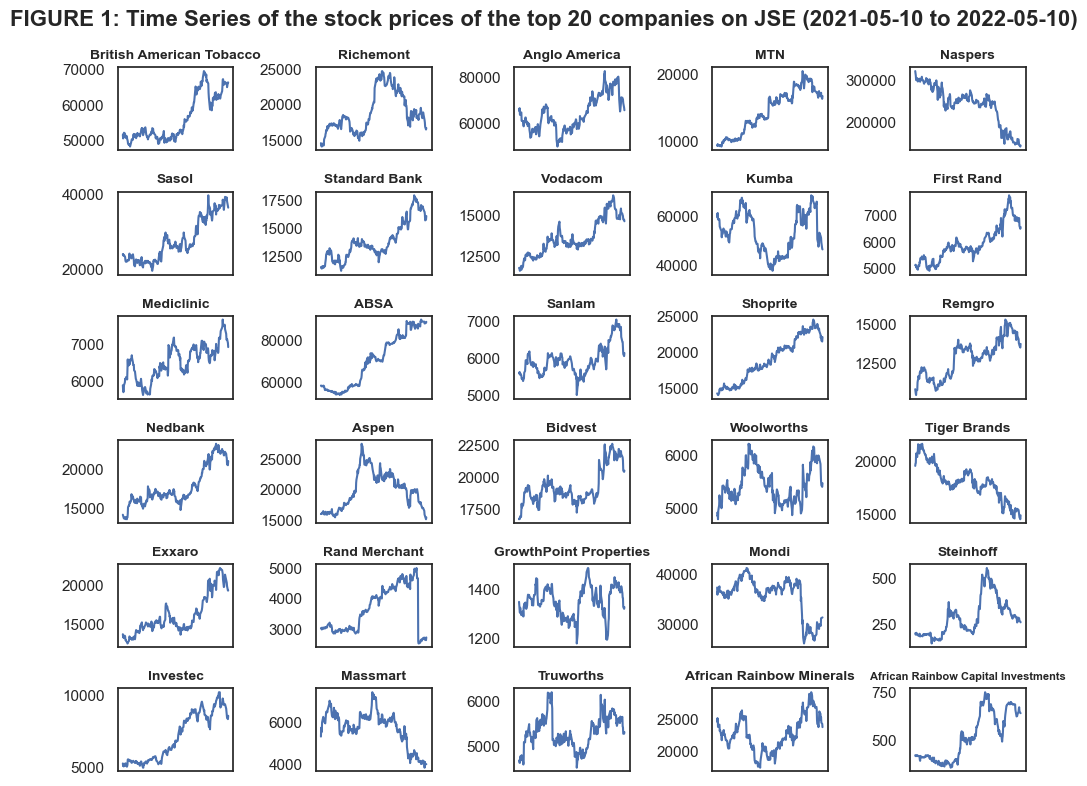

In [12]:
#plotting the daily stock prices
fig, ax = plt.subplots(6,5, sharex = True)

ax[0,0].plot(finance_data.index, 'British American Tobacco', data = finance_data)
ax[0,0].set_title('British American Tobacco', fontsize = 10, fontweight = 'bold')
ax[0,0].set_xticks([])

ax[0,1].plot(finance_data.index, 'Richemont', data = finance_data)
ax[0,1].set_title('Richemont', fontsize = 10, fontweight = 'bold')
ax[0,1].set_xticks([])


ax[0,2].plot(finance_data.index, 'Anglo America', data = finance_data)
ax[0,2].set_title('Anglo America', fontsize = 10, fontweight = 'bold')
ax[0,2].set_xticks([])

ax[0,3].plot(finance_data.index, 'MTN', data = finance_data)
ax[0,3].set_title('MTN', fontsize = 10, fontweight = 'bold')
ax[0,3].set_xticks([])

ax[0,4].plot(finance_data.index, 'Naspers', data = finance_data)
ax[0,4].set_title('Naspers', fontsize = 10, fontweight = 'bold')
ax[0,4].set_xticks([])

ax[1,0].plot(finance_data.index, 'Sasol', data = finance_data)
ax[1,0].set_title('Sasol', fontsize = 10, fontweight = 'bold')
ax[1,0].set_xticks([])

ax[1,1].plot(finance_data.index, 'Standard Bank', data = finance_data)
ax[1,1].set_title('Standard Bank', fontsize = 10, fontweight = 'bold')
ax[1,1].set_xticks([])

ax[1,2].plot(finance_data.index, 'Vodacom', data = finance_data)
ax[1,2].set_title('Vodacom', fontsize = 10, fontweight = 'bold')
ax[1,2].set_xticks([])

ax[1,3].plot(finance_data.index, 'Kumba', data = finance_data)
ax[1,3].set_title('Kumba', fontsize = 10, fontweight = 'bold')
ax[1,3].set_xticks([])

ax[1,4].plot(finance_data.index, 'First Rand', data = finance_data)
ax[1,4].set_title('First Rand', fontsize = 10, fontweight = 'bold')
ax[1,4].set_xticks([])

ax[2,0].plot(finance_data.index, 'Mediclinic', data = finance_data)
ax[2,0].set_title('Mediclinic', fontsize = 10, fontweight = 'bold')
ax[2,0].set_xticks([])

ax[2,1].plot(finance_data.index, 'ABSA', data = finance_data)
ax[2,1].set_title('ABSA', fontsize = 10, fontweight = 'bold')
ax[2,1].set_xticks([])

ax[2,2].plot(finance_data.index, 'Sanlam', data = finance_data)
ax[2,2].set_title('Sanlam', fontsize = 10, fontweight = 'bold')
ax[2,2].set_xticks([])

ax[2,3].plot(finance_data.index, 'Shoprite', data = finance_data)
ax[2,3].set_title('Shoprite', fontsize = 10, fontweight = 'bold')
ax[2,3].set_xticks([])


ax[2,4].plot(finance_data.index, 'Remgro', data = finance_data)
ax[2,4].set_title('Remgro', fontsize = 10, fontweight = 'bold')
ax[2,4].set_xticks([])

ax[3,0].plot(finance_data.index, 'Nedbank', data = finance_data)
ax[3,0].set_title('Nedbank', fontsize = 10, fontweight = 'bold')
ax[3,0].set_xticks([])

ax[3,1].plot(finance_data.index, 'Aspen', data = finance_data)
ax[3,1].set_title('Aspen', fontsize = 10, fontweight = 'bold')
ax[3,1].set_xticks([])

ax[3,2].plot(finance_data.index, 'Bidvest', data = finance_data)
ax[3,2].set_title('Bidvest', fontsize = 10, fontweight = 'bold')
ax[3,2].set_xticks([])

ax[3,3].plot(finance_data.index, 'Woolworths', data = finance_data)
ax[3,3].set_title('Woolworths', fontsize = 10, fontweight = 'bold')
ax[3,3].set_xticks([])

ax[3,4].plot(finance_data.index, 'Tiger Brands', data = finance_data)
ax[3,4].set_title('Tiger Brands', fontsize = 10, fontweight = 'bold')
ax[3,4].set_xticks([])

ax[4,0].plot(finance_data.index, 'Exxaro', data = finance_data)
ax[4,0].set_title('Exxaro', fontsize = 10, fontweight = 'bold')
ax[4,0].set_xticks([])

ax[4,1].plot(finance_data.index, 'Rand Merchant', data = finance_data)
ax[4,1].set_title('Rand Merchant', fontsize = 10, fontweight = 'bold')
ax[4,1].set_xticks([])

ax[4,2].plot(finance_data.index, 'GrowthPoint Properties', data = finance_data)
ax[4,2].set_title('GrowthPoint Properties', fontsize = 10, fontweight = 'bold')
ax[4,2].set_xticks([])

ax[4,3].plot(finance_data.index, 'Mondi', data = finance_data)
ax[4,3].set_title('Mondi', fontsize = 10, fontweight = 'bold')
ax[4,3].set_xticks([])

ax[4,4].plot(finance_data.index, 'Steinhoff', data = finance_data)
ax[4,4].set_title('Steinhoff', fontsize = 10, fontweight = 'bold')
ax[4,4].set_xticks([])

ax[5,0].plot(finance_data.index, 'Investec', data = finance_data)
ax[5,0].set_title('Investec', fontsize = 10, fontweight = 'bold')
ax[5,0].set_xticks([])

ax[5,1].plot(finance_data.index, 'Massmart', data = finance_data)
ax[5,1].set_title('Massmart', fontsize = 10, fontweight = 'bold')
ax[5,1].set_xticks([])

ax[5,2].plot(finance_data.index, 'Truworths', data = finance_data)
ax[5,2].set_title('Truworths', fontsize = 10, fontweight = 'bold')
ax[5,2].set_xticks([])

ax[5,3].plot(finance_data.index, 'African Rainbow Minerals', data = finance_data)
ax[5,3].set_title('African Rainbow Minerals', fontsize = 10, fontweight = 'bold')
ax[5,3].set_xticks([])

ax[5,4].plot(finance_data.index, 'African Rainbow Capital Investments', data = finance_data)
ax[5,4].set_title('African Rainbow Capital Investments', fontsize = 8, fontweight = 'bold')
ax[5,4].set_xticks([])


plt.suptitle('FIGURE 1: Time Series of the stock prices of the top 20 companies on JSE (2021-05-10 to 2022-05-10)', 
             fontsize = 16, 
             fontweight = 'bold')

plt.tight_layout()

plt.show()


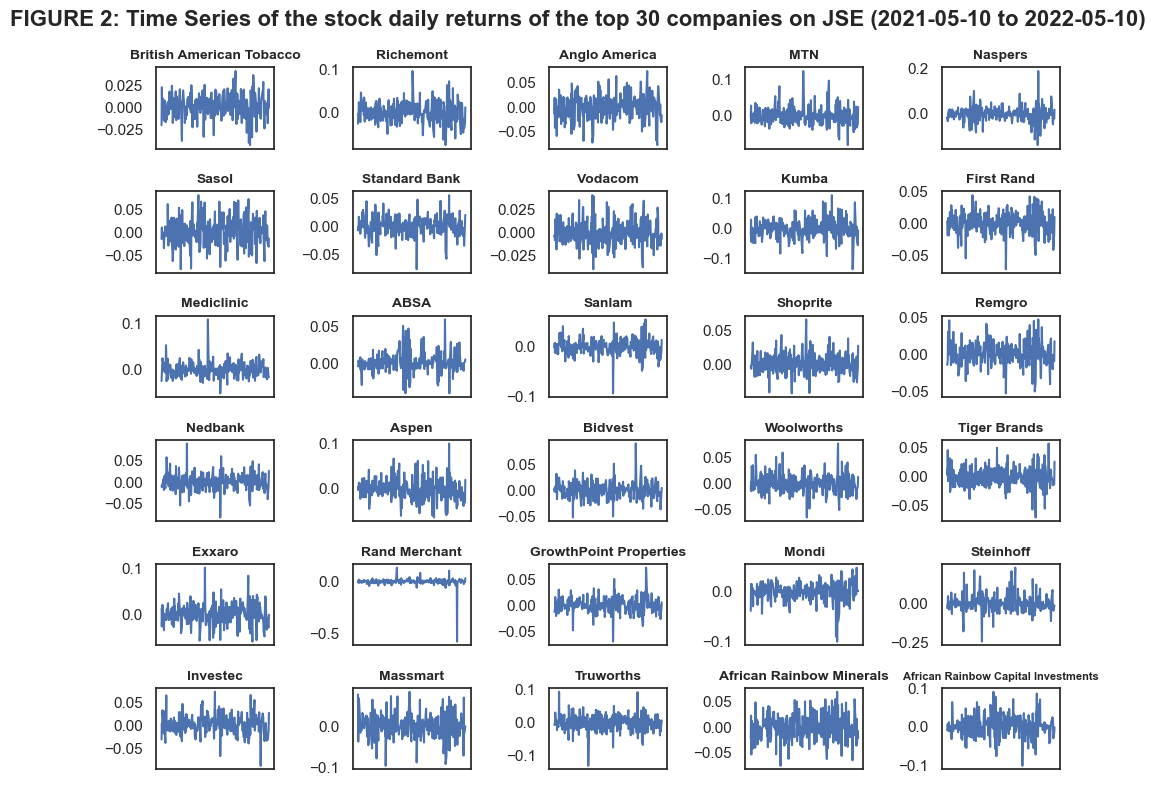

In [13]:
#Plotting the daily stock returns
fig, ax = plt.subplots(6,5, sharex = True)

ax[0,0].plot(daily_returns.index, 'British American Tobacco', data = daily_returns)
ax[0,0].set_title('British American Tobacco', fontsize = 10, fontweight = 'bold')
ax[0,0].set_xticks([])

ax[0,1].plot(daily_returns.index, 'Richemont', data = daily_returns)
ax[0,1].set_title('Richemont', fontsize = 10, fontweight = 'bold')
ax[0,1].set_xticks([])


ax[0,2].plot(daily_returns.index, 'Anglo America', data = daily_returns)
ax[0,2].set_title('Anglo America', fontsize = 10, fontweight = 'bold')
ax[0,2].set_xticks([])

ax[0,3].plot(daily_returns.index, 'MTN', data = daily_returns)
ax[0,3].set_title('MTN', fontsize = 10, fontweight = 'bold')
ax[0,3].set_xticks([])

ax[0,4].plot(daily_returns.index, 'Naspers', data = daily_returns)
ax[0,4].set_title('Naspers', fontsize = 10, fontweight = 'bold')
ax[0,4].set_xticks([])

ax[1,0].plot(daily_returns.index, 'Sasol', data = daily_returns)
ax[1,0].set_title('Sasol', fontsize = 10, fontweight = 'bold')
ax[1,0].set_xticks([])

ax[1,1].plot(daily_returns.index, 'Standard Bank', data = daily_returns)
ax[1,1].set_title('Standard Bank', fontsize = 10, fontweight = 'bold')
ax[1,1].set_xticks([])

ax[1,2].plot(daily_returns.index, 'Vodacom', data = daily_returns)
ax[1,2].set_title('Vodacom', fontsize = 10, fontweight = 'bold')
ax[1,2].set_xticks([])

ax[1,3].plot(daily_returns.index, 'Kumba', data = daily_returns)
ax[1,3].set_title('Kumba', fontsize = 10, fontweight = 'bold')
ax[1,3].set_xticks([])

ax[1,4].plot(daily_returns.index, 'First Rand', data = daily_returns)
ax[1,4].set_title('First Rand', fontsize = 10, fontweight = 'bold')
ax[1,4].set_xticks([])

ax[2,0].plot(daily_returns.index, 'Mediclinic', data = daily_returns)
ax[2,0].set_title('Mediclinic', fontsize = 10, fontweight = 'bold')
ax[2,0].set_xticks([])

ax[2,1].plot(daily_returns.index, 'ABSA', data = daily_returns)
ax[2,1].set_title('ABSA', fontsize = 10, fontweight = 'bold')
ax[2,1].set_xticks([])

ax[2,2].plot(daily_returns.index, 'Sanlam', data = daily_returns)
ax[2,2].set_title('Sanlam', fontsize = 10, fontweight = 'bold')
ax[2,2].set_xticks([])

ax[2,3].plot(daily_returns.index, 'Shoprite', data = daily_returns)
ax[2,3].set_title('Shoprite', fontsize = 10, fontweight = 'bold')
ax[2,3].set_xticks([])


ax[2,4].plot(daily_returns.index, 'Remgro', data = daily_returns)
ax[2,4].set_title('Remgro', fontsize = 10, fontweight = 'bold')
ax[2,4].set_xticks([])

ax[3,0].plot(daily_returns.index, 'Nedbank', data = daily_returns)
ax[3,0].set_title('Nedbank', fontsize = 10, fontweight = 'bold')
ax[3,0].set_xticks([])

ax[3,1].plot(daily_returns.index, 'Aspen', data = daily_returns)
ax[3,1].set_title('Aspen', fontsize = 10, fontweight = 'bold')
ax[3,1].set_xticks([])

ax[3,2].plot(daily_returns.index, 'Bidvest', data = daily_returns)
ax[3,2].set_title('Bidvest', fontsize = 10, fontweight = 'bold')
ax[3,2].set_xticks([])

ax[3,3].plot(daily_returns.index, 'Woolworths', data = daily_returns)
ax[3,3].set_title('Woolworths', fontsize = 10, fontweight = 'bold')
ax[3,3].set_xticks([])

ax[3,4].plot(daily_returns.index, 'Tiger Brands', data = daily_returns)
ax[3,4].set_title('Tiger Brands', fontsize = 10, fontweight = 'bold')
ax[3,4].set_xticks([])

ax[4,0].plot(daily_returns.index, 'Exxaro', data = daily_returns)
ax[4,0].set_title('Exxaro', fontsize = 10, fontweight = 'bold')
ax[4,0].set_xticks([])

ax[4,1].plot(daily_returns.index, 'Rand Merchant', data = daily_returns)
ax[4,1].set_title('Rand Merchant', fontsize = 10, fontweight = 'bold')
ax[4,1].set_xticks([])

ax[4,2].plot(daily_returns.index, 'GrowthPoint Properties', data = daily_returns)
ax[4,2].set_title('GrowthPoint Properties', fontsize = 10, fontweight = 'bold')
ax[4,2].set_xticks([])

ax[4,3].plot(daily_returns.index, 'Mondi', data = daily_returns)
ax[4,3].set_title('Mondi', fontsize = 10, fontweight = 'bold')
ax[4,3].set_xticks([])

ax[4,4].plot(daily_returns.index, 'Steinhoff', data = daily_returns)
ax[4,4].set_title('Steinhoff', fontsize = 10, fontweight = 'bold')
ax[4,4].set_xticks([])

ax[5,0].plot(daily_returns.index, 'Investec', data = daily_returns)
ax[5,0].set_title('Investec', fontsize = 10, fontweight = 'bold')
ax[5,0].set_xticks([])

ax[5,1].plot(daily_returns.index, 'Massmart', data = daily_returns)
ax[5,1].set_title('Massmart', fontsize = 10, fontweight = 'bold')
ax[5,1].set_xticks([])

ax[5,2].plot(daily_returns.index, 'Truworths', data = daily_returns)
ax[5,2].set_title('Truworths', fontsize = 10, fontweight = 'bold')
ax[5,2].set_xticks([])

ax[5,3].plot(daily_returns.index, 'African Rainbow Minerals', data = daily_returns)
ax[5,3].set_title('African Rainbow Minerals', fontsize = 10, fontweight = 'bold')
ax[5,3].set_xticks([])

ax[5,4].plot(daily_returns.index, 'African Rainbow Capital Investments', data = daily_returns)
ax[5,4].set_title('African Rainbow Capital Investments', fontsize = 8, fontweight = 'bold')
ax[5,4].set_xticks([])


plt.suptitle('FIGURE 2: Time Series of the stock daily returns of the top 30 companies on JSE (2021-05-10 to 2022-05-10)', 
             fontsize = 16, 
             fontweight = 'bold')

plt.tight_layout()

plt.show()

# KMeans Clustering

Kmeans is a simple unsupervised machine learning algothrim that is used for cluster analysis.

The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

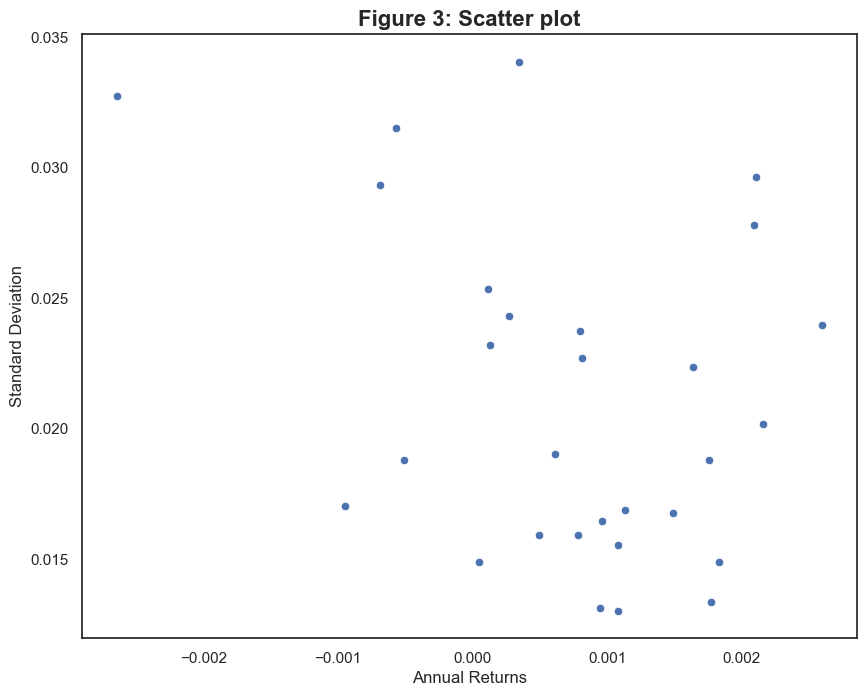

In [40]:
sns.scatterplot(x = df_returns_std['Annual Returns'],y = df_returns_std['Standard Deviation'])

plt.title('Figure 3: Scatter plot',
            fontsize = 16, 
            fontweight = 'bold')

plt.show()

From viewing the scatter plot in figure , there is no clear indication of the number of clusters there are, hence which is why the elbow method is crucial

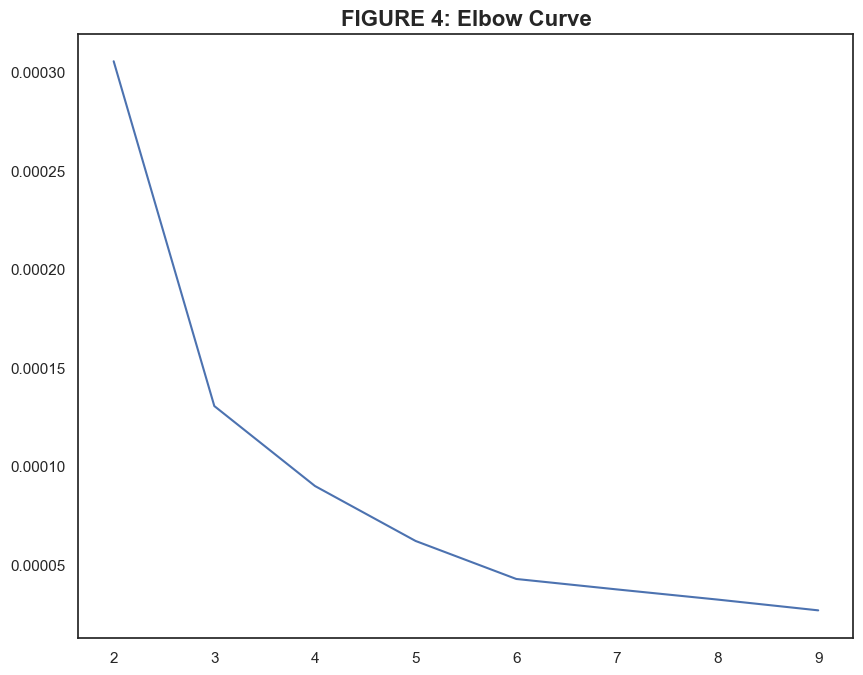

In [38]:
#Elbow curve by calcalting the SSE for different values of k
X =  df_returns_std.values #Converting df_returns into nummpy array
sse = []
for k in range(2,10):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
    
plt.plot(range(2,10), sse)

plt.title('FIGURE 4: Elbow Curve',
          fontsize = 16, 
          fontweight = 'bold')

plt.show()

The best way to determine the optimal number of clusters is by using the Elbow Curve shown above.

Over a predetermined range of clusters (k), this method will be varying the number of clusters. For each value of 'k', the sum of squared Euclidean distance (SSE) between each point of the cluster and the centroid of the cluster is calculated.

When the SSE is plotted it will be like an Elbow as illustrated above in figure 3.

As the number of clusters increases the value of SSE will decrease. When 'k' is equal to 1 that is when SSE is at its largest.

Therefore, the point of the elbow will highlight the optimal value for 'k', and in this case, the optimal value for k is five.


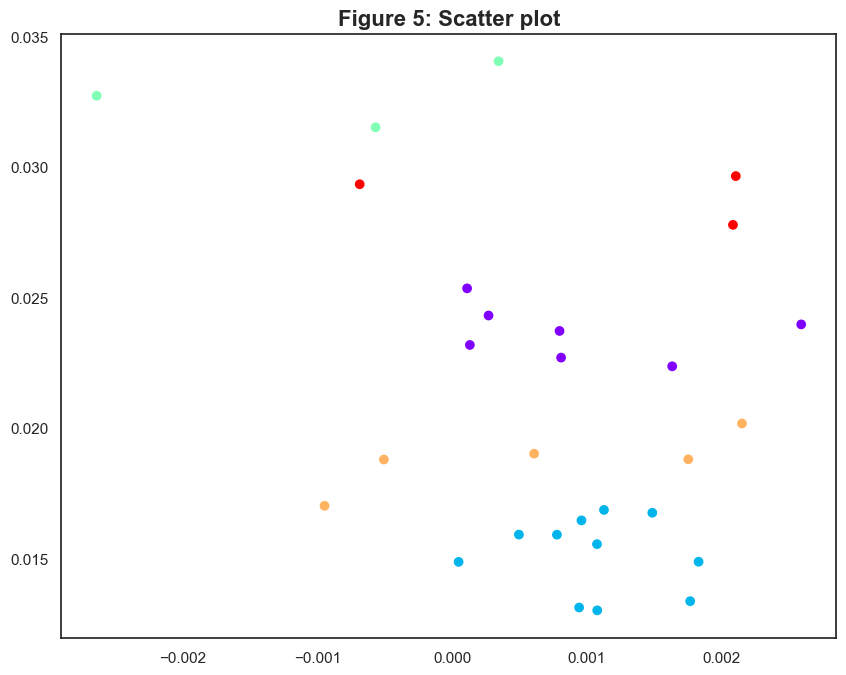

In [41]:
#training the kmeans model using 5 clusters
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1], 
            c = kmeans.labels_, 
            cmap ="rainbow")

plt.title('Figure 5: Scatter plot', 
          fontsize = 16, 
          fontweight = 'bold')

plt.show()

In [18]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 2, 2, 2, 1, 1, 4, 0, 1, 4, 0, 0, 0, 0, 0, 4, 2, 4, 4, 4, 2, 1,
       0, 4, 3, 4, 1, 2, 2, 1])

There is an outlier present in the data so that will be removed from the dataset

In [19]:
print(df_returns_std.idxmax())

Annual Returns        Steinhoff
Standard Deviation    Steinhoff
dtype: object


In [20]:
#Removing Steinhoff from the data set
df_returns_std.drop('Steinhoff', inplace=True)

In [21]:
df_returns_std

,Annual Returns,Standard Deviation
British American Tobacco,0.001078,0.013018
Richemont,0.000810,0.022701
Anglo America,0.000270,0.024315
MTN,0.002594,0.023974
Naspers,-0.002642,0.032734
Sasol,0.002108,0.029657
Standard Bank,0.001487,0.016756
Vodacom,0.000944,0.013127
Kumba,-0.000569,0.031527
First Rand,0.001128,0.016866


In [27]:
#creating lists of the variable to be looped over to name the scatter plot points
returns_coord = list(df_returns_std['Annual Returns'])
std_coord = list(df_returns_std['Standard Deviation'])
companies_list = list(df_returns_std.index)

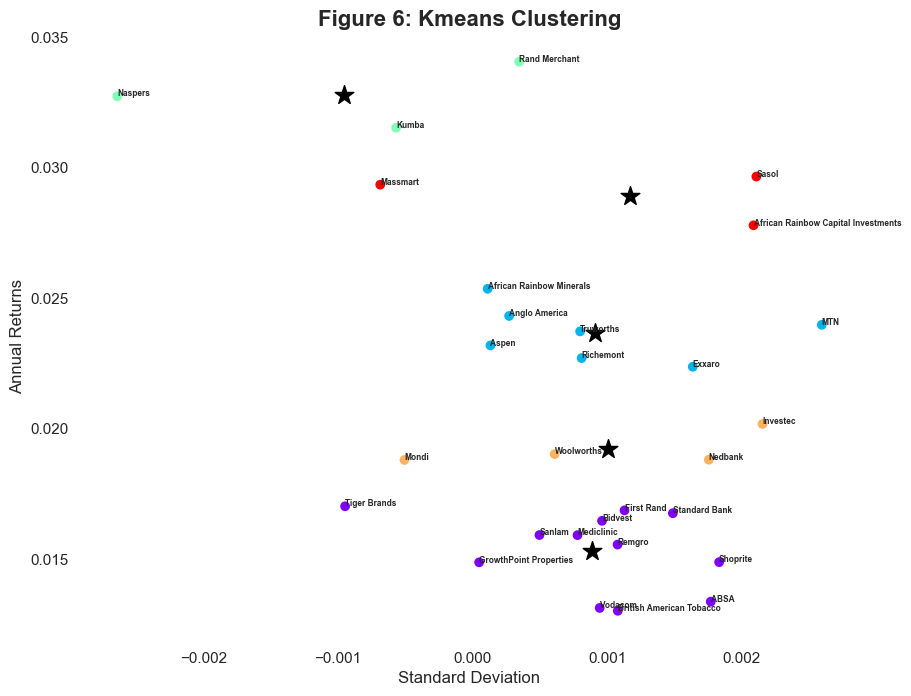

In [42]:
X = df_returns_std.values
#fitting the model
kmeans =KMeans(n_clusters = 5).fit(X)
#the cluster centroids
centroids = kmeans.cluster_centers_

#plotting the clustered scatter plot
fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap = 'rainbow')

for a, b, c in zip(returns_coord,std_coord,companies_list):
    ax.text(a, b, c, fontsize = 6, fontweight = 'bold')
    
plt.scatter(centroids[0,0], 
            centroids[0,1], 
            s = 200, 
            marker = '*', 
            color = 'black')

plt.scatter(centroids[1,0], 
            centroids[1,1], 
            s = 200, 
            marker = '*', 
            color = 'black')

plt.scatter(centroids[2,0], 
            centroids[2,1], 
            s = 200, 
            marker = '*', 
            color = 'black')

plt.scatter(centroids[3,0], 
            centroids[3,1], 
            s = 200, 
            marker = '*', 
            color = 'black')

plt.scatter(centroids[4,0], 
            centroids[4,1], 
            s = 200, 
            marker = '*', 
            color = 'black')

plt.xlabel('Standard Deviation')

plt.ylabel('Annual Returns')

plt.title('Figure 6: Kmeans Clustering', 
          fontsize = 16, 
          fontweight = 'bold')

ax.set_frame_on(False)

plt.show()

In [24]:
#Creating cluster labels and merging dataframe of clusters and the company names
cluster_labels = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
Company = pd.DataFrame(df_returns_std.index, columns=['Companies'])

df_companies_clustered = pd.concat([Company, cluster_labels], axis = 1).sort_values('Cluster')
df_companies_clustered

,Companies,Cluster
0,British American Tobacco,0
22,GrowthPoint Properties,0
17,Bidvest,0
13,Shoprite,0
12,Sanlam,0
11,ABSA,0
10,Mediclinic,0
9,First Rand,0
14,Remgro,0
7,Vodacom,0


In [25]:
#Color coded rows of the different clustered companies for easier visualisation
def format_color_groups(df):
    colors = ['red', 'yellow']
    x = df_companies_clustered.copy()
    factors = list(x['Cluster'].unique())
    i = 0
    for factor in factors:
        style = f'background-color: {colors[i]}'
        x.loc[x['Cluster'] == factor, :] = style
        i = not i
    return x

df_companies_clustered.style.apply(format_color_groups, axis=None)

,Companies,Cluster
0,British American Tobacco,0
22,GrowthPoint Properties,0
17,Bidvest,0
13,Shoprite,0
12,Sanlam,0
11,ABSA,0
10,Mediclinic,0
9,First Rand,0
14,Remgro,0
7,Vodacom,0


# Hierarchical Clustering (Dendrogram)

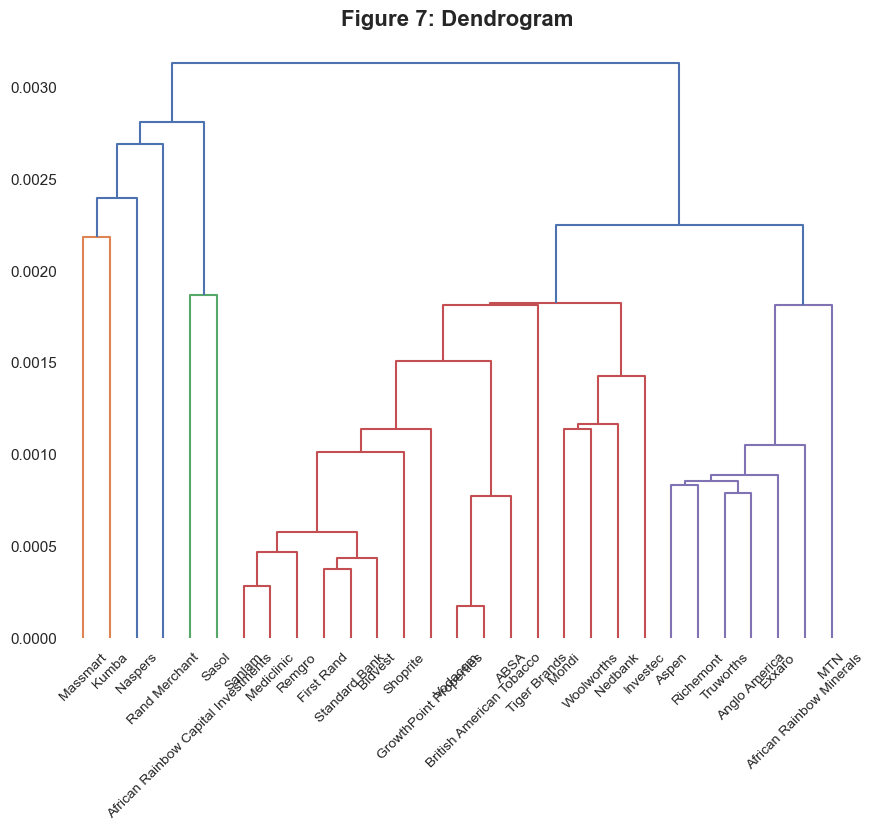

In [44]:
linked = linkage(X)
fig, ax = plt.subplots()
dendrogram(linked, 
           orientation='top',
           distance_sort='descending', 
           labels=companies_list)

plt.title('Figure 7: Dendrogram', 
          fontsize = 16, 
          fontweight = 'bold')

ax.set_frame_on(False)

plt.show()